In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy
import random


ModuleNotFoundError: No module named 'numpy'

In [ ]:
def propagation_step(t2, t1, X_t1, psi_l, psi_r, r, w, sigma_l, sigma_r):
    X_t2 = np.empty((X_t1.shape[0], X_t1.shape[1], X_t1.shape[2]))
    for i in range(len(X_t1)):
        psi_l_noisy = np.random.normal(psi_l, sigma_l)
        psi_r_noisy = np.random.normal(psi_r, sigma_r)
        omega = np.asarray([[0, -(r/w)*(psi_r_noisy - psi_l_noisy), (r/2)*(psi_r_noisy + psi_l_noisy)],[(r/w)*(psi_r_noisy - psi_l_noisy), 0 , 0], [0 , 0 , 0]])
        X_t2[i] = X_t1[i] @ scipy.linalg.expm((t2-t1)*omega)  
    return X_t2

In [ ]:

def measurement_update_step(X_t, z_t, sigma_p):
    weights = np.empty((len(X_t),1))
    for i in range(len(X_t)):
        weights[i] = multivariate_normal.pdf(z_t, mean = [X_t[i,0,2], X_t[i,1,2]] , cov = (sigma_p**2)*np.identity(2))

    X_t_bar = np.empty((X_t.shape[0], X_t.shape[1], X_t.shape[2]))   
    
    X_t_bar = np.asarray(random.choices(X_t, weights= weights, k = 1000))

    return X_t_bar



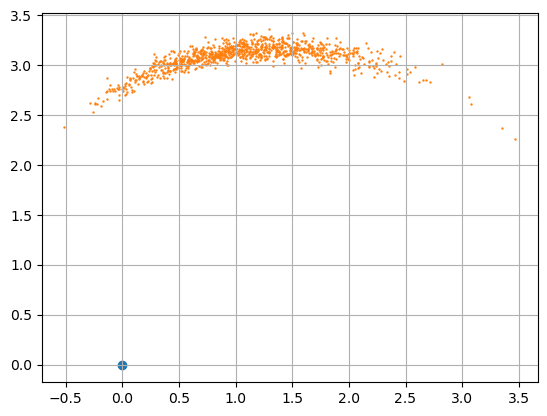

The mean of the translation vector of the particles at 10 
[array([1.07475557, 3.08158813])]
The Cov of the translation vector of the particles at 10 
[array([[0.37996649, 0.03032301],
       [0.03032301, 0.01715814]])]


In [ ]:
if __name__ == "__main__":

    X = np.asarray([[1,0,0],[0,1,0],[0,0,1]])
    X = np.tile(X, (1000,1,1))
    t = 10
    psi_l = 1.5
    psi_r = 2
    r = 0.25
    w = 0.5
    sigma_l = 0.05
    sigma_r = 0.05
    sigma_p = 0.1
    prev_indx = 0
    mean = []
    cov = []

    plt.scatter(0,0)
    X = propagation_step(t, prev_indx, X, psi_l, psi_r, r, w, sigma_l, sigma_r)
    # Mean of the translation vector of the particles
    mean.append(np.mean(X[:,:-1,2], axis = 0))
    # Covariance of the translation vector of the particles
    cov.append(np.cov(X[:,:-1,2], rowvar = False))  
    plt.scatter(X[:,0,2], X[:,1,2], s=0.5, label=" timestamp: {}".format(t))
     

    plt.grid()
    plt.show()
    # Print mean in a readable format
    print("The mean of the translation vector of the particles at 10 ")
    print(mean)
    print("The Cov of the translation vector of the particles at 10 ")
    print(cov)

    
    

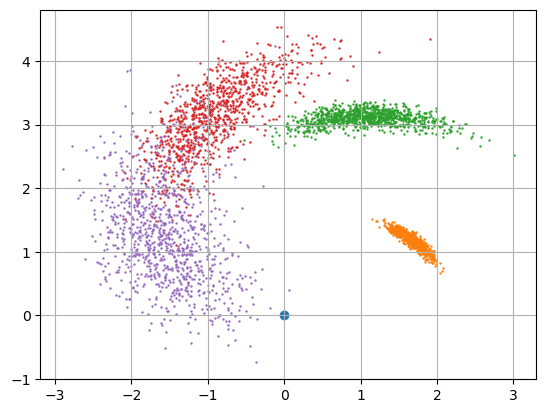

The mean of the translation vector of the particles at each timestamp is: 
timestamp 5: [1.65704593 1.18551697]
timestamp 10: [1.06541787 3.09547009]
timestamp 15: [-0.90422582  3.12603471]
timestamp 20: [-1.54363395  1.29470383]
---------------------
Covariance matrix at timestamp 5 is:
[[ 0.02024743 -0.01669602]
 [-0.01669602  0.0168521 ]]
----------------
Covariance matrix at timestamp 10 is:
[[0.26545204 0.00108439]
 [0.00108439 0.01397321]]
----------------
Covariance matrix at timestamp 15 is:
[[0.29124937 0.22977203]
 [0.22977203 0.34005102]]
----------------
Covariance matrix at timestamp 20 is:
[[ 0.22704245 -0.1093133 ]
 [-0.1093133   0.61709995]]
----------------


In [ ]:
if __name__ == "__main__":

    X = np.asarray([[1,0,0],[0,1,0],[0,0,1]])
    X = np.tile(X, (1000,1,1))
    t = [5,10,15,20]
    psi_l = 1.5
    psi_r = 2
    r = 0.25
    w = 0.5
    sigma_l = 0.05
    sigma_r = 0.05
    sigma_p = 0.1
    prev_indx = 0
    mean = []
    cov = []
    
    measurements = np.asarray([[1.6561, 1.2847], [1.0505, 3.1059], [-0.9875, 3.2118], [-1.6450, 1.1978]])
    plt.scatter(0,0)

    count = 0
    for i in range(len(t)):
        X = propagation_step(t[i], prev_indx, X, psi_l, psi_r, r, w, sigma_l, sigma_r)
        # Mean of the translation vector of the particles
        mean.append(np.mean(X[:,:-1,2], axis = 0))
        # Covariance of the translation vector of the particles
        cov.append(np.cov(X[:,:-1,2], rowvar = False))


        prev_indx = t[i]       
        plt.scatter(X[:,0,2], X[:,1,2], s=0.5, label=" timestamp: {}".format(i))
     

    plt.grid()
    plt.show()
    # Print mean in a readable format
    print("The mean of the translation vector of the particles at each timestamp is: ")
    for i in range(len(mean)):
        print("timestamp {}: {}".format(t[i], mean[i]))
    print("---------------------")

    # Print cov matrix in a readable format
    for i in range(len(cov)):
        print("Covariance matrix at timestamp {} is:".format(t[i]))
        print(cov[i])
        print("----------------")

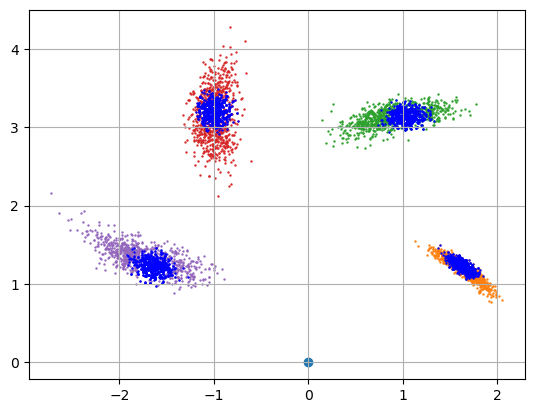

The mean of the translation vector of the particles at each timestamp is: 
timestamp 5: [1.62854683 1.23312886]
timestamp 10: [1.03374572 3.1419968 ]
timestamp 15: [-0.99984702  3.20932173]
timestamp 20: [-1.63889845  1.22102301]
----------------
Covariance matrix at timestamp 5 is:
[[ 0.00499692 -0.00312427]
 [-0.00312427  0.00391566]]
----------------
Covariance matrix at timestamp 10 is:
[[8.54627055e-03 1.63074256e-05]
 [1.63074256e-05 4.72888546e-03]]
----------------
Covariance matrix at timestamp 15 is:
[[ 0.00589109 -0.00025895]
 [-0.00025895  0.00925551]]
----------------
Covariance matrix at timestamp 20 is:
[[ 0.0078263  -0.00130267]
 [-0.00130267  0.00613941]]
----------------


In [ ]:
if __name__ == "__main__":

    X = np.asarray([[1,0,0],[0,1,0],[0,0,1]])
    X = np.tile(X, (1000,1,1))
    t = [5,10,15,20]
    psi_l = 1.5
    psi_r = 2
    r = 0.25
    w = 0.5
    sigma_l = 0.05
    sigma_r = 0.05
    sigma_p = 0.1
    prev_indx = 0
    mean_val = []
    cov_val = []
    measurements = np.asarray([[1.6561, 1.2847], [1.0505, 3.1059], [-0.9875, 3.2118], [-1.6450, 1.1978]])
    plt.scatter(0,0)

    count = 0
    for i in range(len(t)):
        X = propagation_step(t[i], prev_indx, X, psi_l, psi_r, r, w, sigma_l, sigma_r)
        prev_indx = t[i]       
        plt.scatter(X[:,0,2], X[:,1,2], s=0.5, label=" timestamp: {}".format(i))
        X = measurement_update_step(X, measurements[i], sigma_p)
        # Mean of the translation vector of the particles
        mean_val.append(np.mean(X[:,:-1,2], axis = 0))
        # Covariance of the translation vector of the particles
        cov_val.append(np.cov(X[:,:-1,2], rowvar = False))  
        plt.scatter(X[:,0,2], X[:,1,2], s=0.5, label=" timestamp: {}".format(i), c='b')       

    plt.grid()
    plt.show()
    # Print mean in a readable format
    print("The mean of the translation vector of the particles at each timestamp is: ")
    for i in range(len(mean_val)):
        print("timestamp {}: {}".format(t[i], mean_val[i]))
    
    print("----------------")

    # Print cov matrix in a readable format
    for i in range(len(cov_val)):
        print("Covariance matrix at timestamp {} is:".format(t[i]))
        print(cov_val[i])
        print("----------------")
    